# Log-Time Visualizations: σ = log(τ/τ₀)

This notebook demonstrates the logarithmic-time transformation **σ = log(τ/τ₀)** across three fundamental physics domains:

## Overview

1. **🔴 Singularity Regularization** — Shows how divergent quantities Q ∝ 1/τ become well-behaved Q(σ) ∝ e^(-σ), and visualizes the effective Hamiltonian scaling H_eff(σ) = τ₀e^σ H

2. **⚫ Near-Horizon Physics** — Compares redshift models near Schwarzschild horizons and plots σ(r) = log α(r) + log(τ/τ₀)

3. **🌌 FLRW Cosmology** — Compares radiation, matter, and de Sitter expansions in σ-time, visualizing (1/a)da/dσ expansion rates

## Key Mathematical Insights

- **Singularities**: τ → 0 divergences become exponential decay in σ-space
- **Horizons**: Different redshift behaviors produce distinct σ(r) profiles  
- **Cosmology**: Power-law scale factors a(t) ∝ t^n → exponentials a(σ) = e^(nσ)

> **Requirements**: numpy, matplotlib only  
> **Usage**: Adjust parameters in the Controls cell, then run all visualizations

In [1]:
# ========================================
# CONTROLS - Adjust these parameters
# ========================================

# Physical parameters
tau0 = 1.0        # Reference proper time τ₀
H = 0.7           # Hubble parameter for de Sitter expansion
rs = 1.0          # Schwarzschild radius r_s (in geometric units)
rmax = 12.0       # Maximum radius for horizon plots (in units of r_s)
tau_ratio_term = 0.0  # Additive log(τ/τ₀) term for σ(r) analysis

# Output settings
save_figures = True     # Set to True to save high-quality PNG files
output_dir = "figs"     # Directory for saved figures
figure_dpi = 200        # DPI for saved figures (higher = better quality)

print(f"Configuration:")
print(f"  τ₀ = {tau0}")
print(f"  H = {H}")
print(f"  r_s = {rs}")
print(f"  r_max = {rmax}")
print(f"  Save figures: {'Yes' if save_figures else 'No'}")
if save_figures:
    print(f"  Output dir: {output_dir}/")
    print(f"  DPI: {figure_dpi}")

Configuration:
  τ₀ = 1.0
  H = 0.7
  r_s = 1.0
  r_max = 12.0
  Save figures: Yes
  Output dir: figs/
  DPI: 200


In [2]:
# ========================================
# IMPORTS AND UTILITY FUNCTIONS
# ========================================

import os
import numpy as np
import matplotlib.pyplot as plt

# Set matplotlib style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['grid.alpha'] = 0.3

def sigma_from_tau(tau, tau0=1.0):
    """
    Convert proper time τ to log-time σ.
    
    σ = log(τ/τ₀), with τ, τ₀ > 0
    """
    return np.log(tau / tau0)

def tau_from_sigma(sigma, tau0=1.0):
    """
    Convert log-time σ back to proper time τ.
    
    τ = τ₀ × e^σ
    """
    return tau0 * np.exp(sigma)

def safe_log(x, floor=1e-300):
    """
    Numerically safe logarithm with positive floor to avoid -∞.
    """
    return np.log(np.clip(x, floor, None))

# Create output directory if saving is enabled
if save_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created output directory: {output_dir}/")

print("✅ Setup complete!")

✅ Setup complete!


## 1️⃣ Singularity Regularization and H_eff(σ)

The log-time transformation **σ = log(τ/τ₀)** converts divergent behavior near τ → 0 into smooth exponential forms:

- **Divergent in τ-space**: Q(τ) ∝ 1/τ → ∞ as τ → 0⁺
- **Regular in σ-space**: Q(σ) ∝ e^(-σ) → smooth as σ → -∞  
- **Effective Hamiltonian**: H_eff(σ) = τ₀e^σ H shows natural scaling

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:29: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:31: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "singularity_Q_tau.png"), dpi=dpi, bbox_inches='tight')
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


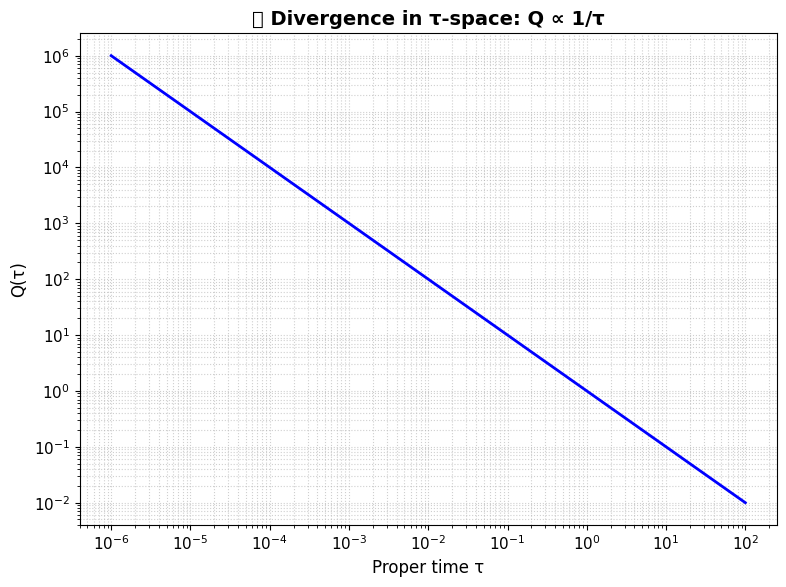

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:41: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:43: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "singularity_Q_sigma.png"), dpi=dpi, bbox_inches='tight')
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


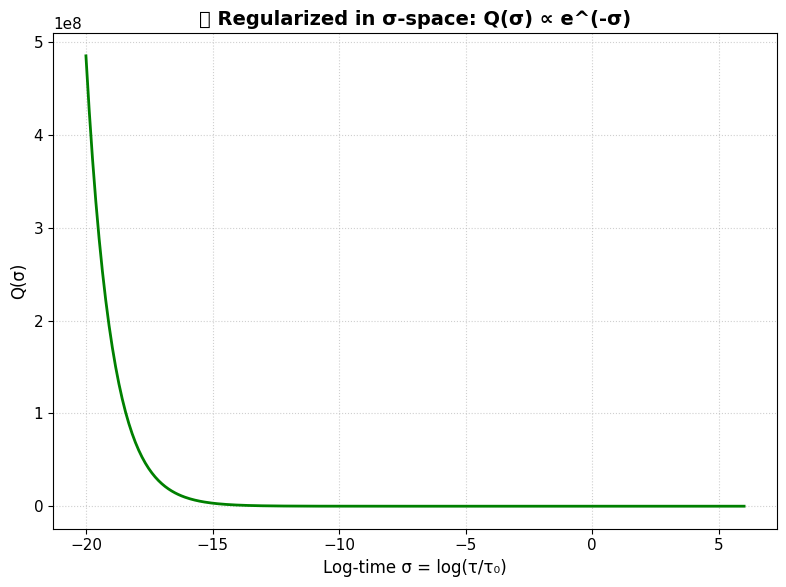

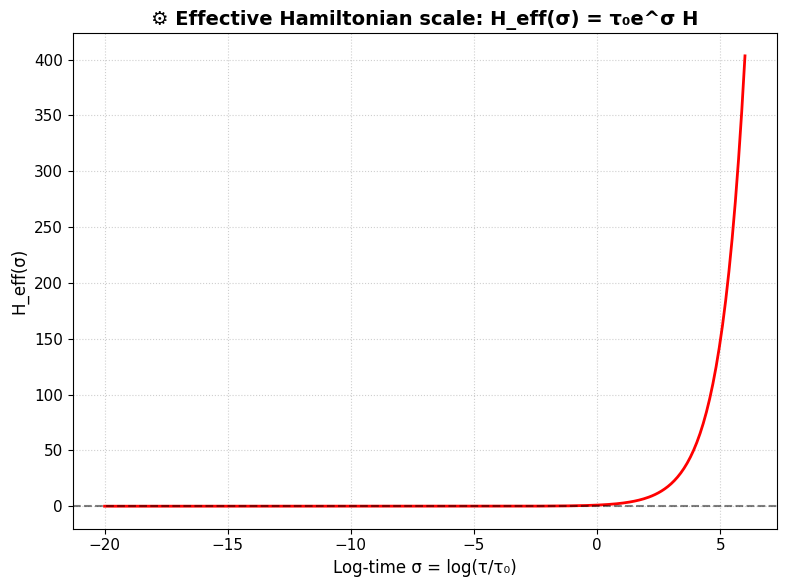

In [3]:
def visualize_singularity(tau0=1.0, save=False, outdir=".", dpi=150):
    """
    Visualize singularity regularization through log-time transformation.
    
    Shows three aspects:
    1. Divergent behavior Q ∝ 1/τ in τ-space
    2. Regularized behavior Q ∝ e^(-σ) in σ-space  
    3. Effective Hamiltonian scaling H_eff(σ) = τ₀e^σ H
    """
    
    # τ-space: approach singularity from the right (τ → 0⁺)
    tau = np.logspace(-6, 2, 400)  # 10^(-6) to 10^2
    Q_tau = 1.0 / tau  # Typical divergent quantity Q ∝ 1/τ

    # σ-space: equivalent range in log-time coordinates
    sigma = np.linspace(-20, 6, 400)  # Early times (τ→0) to late times
    Q_sigma = (1.0 / tau0) * np.exp(-sigma)  # Q(σ) ∝ e^(-σ) / τ₀

    # Effective Hamiltonian scale (set H=1 for demonstration)
    H_eff = tau0 * np.exp(sigma) * 1.0

    # === PLOT 1: Divergence in τ-space ===
    plt.figure(figsize=(8, 6))
    plt.loglog(tau, Q_tau, 'b-', linewidth=2)
    plt.title("🔴 Divergence in τ-space: Q ∝ 1/τ", fontsize=14, fontweight='bold')
    plt.xlabel("Proper time τ", fontsize=12)
    plt.ylabel("Q(τ)", fontsize=12)
    plt.grid(True, which="both", ls=":", alpha=0.6)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "singularity_Q_tau.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

    # === PLOT 2: Regularized in σ-space ===
    plt.figure(figsize=(8, 6))
    plt.plot(sigma, Q_sigma, 'g-', linewidth=2)
    plt.title("✅ Regularized in σ-space: Q(σ) ∝ e^(-σ)", fontsize=14, fontweight='bold')
    plt.xlabel("Log-time σ = log(τ/τ₀)", fontsize=12)
    plt.ylabel("Q(σ)", fontsize=12)
    plt.grid(True, ls=":", alpha=0.6)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "singularity_Q_sigma.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

    # === PLOT 3: Effective Hamiltonian scaling ===
    plt.figure(figsize=(8, 6))
    plt.plot(sigma, H_eff, 'r-', linewidth=2)
    plt.title("⚙️ Effective Hamiltonian scale: H_eff(σ) = τ₀e^σ H", fontsize=14, fontweight='bold')
    plt.xlabel("Log-time σ = log(τ/τ₀)", fontsize=12)
    plt.ylabel("H_eff(σ)", fontsize=12)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    plt.grid(True, ls=":", alpha=0.6)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "singularity_H_eff.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

# Run the singularity visualization
visualize_singularity(tau0=tau0, save=save_figures, outdir=output_dir, dpi=figure_dpi)

## 2️⃣ Near-Horizon Physics: σ(r) = log α(r) + log(τ/τ₀)

Near a Schwarzschild black hole, the redshift factor α(r) determines the log-time behavior:

- **Standard model**: α(r) = √(1 - r_s/r) → 0 as r → r_s⁺ (horizon approach)
- **Alternative model**: α(r) = 2r_s/(r - r_s) → ∞ as r → r_s⁺ (divergent form)
- **Log-time**: σ(r) = log α(r) + log(τ/τ₀) shows distinct horizon signatures

The dashed vertical line marks the event horizon at **r = r_s**.

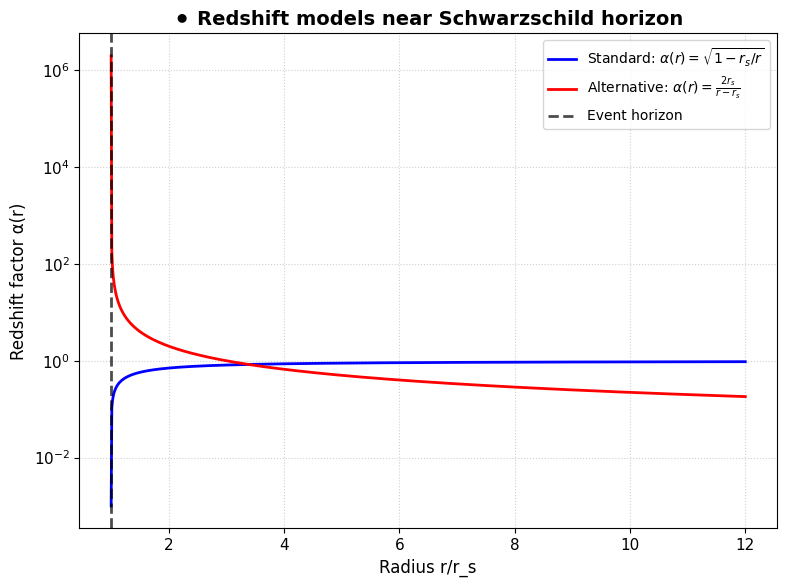

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\942771060.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\942771060.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "horizon_sigma.png"), dpi=dpi, bbox_inches='tight')
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


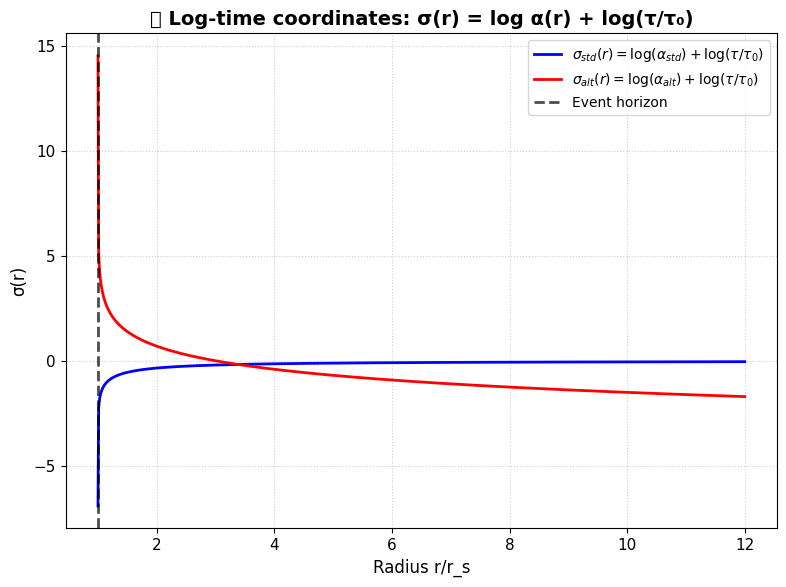

In [4]:
def alpha_standard(r, rs):
    """
    Standard Schwarzschild redshift factor outside the horizon.
    
    α(r) = √(1 - r_s/r) → 0 as r → r_s⁺
    """
    return np.sqrt(1.0 - (rs / r))

def alpha_alt_text(r, rs):
    """
    Alternative divergent redshift form for comparison.
    
    α(r) = 2r_s/(r - r_s) → ∞ as r → r_s⁺
    
    Note: This is sometimes used in heuristic derivations 
    but produces opposite divergent behavior near the horizon.
    """
    return 2.0 * rs / (r - rs)

def visualize_horizon(rs=1.0, rmax=10.0, tau_ratio_term=0.0, save=False, outdir=".", dpi=150):
    """
    Visualize redshift behavior near a Schwarzschild horizon.
    
    Compares two models for α(r) and their log-time signatures σ(r).
    """
    
    # Sample radial coordinates just outside the horizon
    r = np.linspace(rs + 1e-6, rmax, 1000)

    # Calculate redshift factors
    a_std = alpha_standard(r, rs)
    a_alt = alpha_alt_text(r, rs)

    # Calculate log-time coordinates
    sigma_std = safe_log(a_std) + tau_ratio_term
    sigma_alt = safe_log(a_alt) + tau_ratio_term

    # === PLOT 1: Redshift factors α(r) ===
    plt.figure(figsize=(8, 6))
    plt.plot(r/rs, a_std, 'b-', linewidth=2, label=r"Standard: $\alpha(r) = \sqrt{1 - r_s/r}$")
    plt.plot(r/rs, a_alt, 'r-', linewidth=2, label=r"Alternative: $\alpha(r) = \frac{2r_s}{r - r_s}$")
    plt.yscale("log")
    plt.title("⚫ Redshift models near Schwarzschild horizon", fontsize=14, fontweight='bold')
    plt.xlabel("Radius r/r_s", fontsize=12)
    plt.ylabel("Redshift factor α(r)", fontsize=12)
    plt.axvline(1.0, ls="--", color='k', alpha=0.7, linewidth=2, label="Event horizon")
    plt.grid(True, ls=":", alpha=0.6)
    plt.legend(fontsize=10)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "horizon_alpha.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

    # === PLOT 2: Log-time coordinates σ(r) ===
    plt.figure(figsize=(8, 6))
    plt.plot(r/rs, sigma_std, 'b-', linewidth=2, label=r"$\sigma_{std}(r) = \log(\alpha_{std}) + \log(\tau/\tau_0)$")
    plt.plot(r/rs, sigma_alt, 'r-', linewidth=2, label=r"$\sigma_{alt}(r) = \log(\alpha_{alt}) + \log(\tau/\tau_0)$")
    plt.title("📊 Log-time coordinates: σ(r) = log α(r) + log(τ/τ₀)", fontsize=14, fontweight='bold')
    plt.xlabel("Radius r/r_s", fontsize=12)
    plt.ylabel("σ(r)", fontsize=12)
    plt.axvline(1.0, ls="--", color='k', alpha=0.7, linewidth=2, label="Event horizon")
    plt.grid(True, ls=":", alpha=0.6)
    plt.legend(fontsize=10)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "horizon_sigma.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

# Run the horizon visualization
visualize_horizon(rs=rs, rmax=rmax, tau_ratio_term=tau_ratio_term, 
                 save=save_figures, outdir=output_dir, dpi=figure_dpi)

## 3️⃣ FLRW Cosmology in σ-time

In log-time coordinates, cosmological evolution reveals elegant patterns:

- **Radiation era**: a(t) ∝ t^(1/2) → a(σ) = e^(σ/2) (constant expansion rate in σ-time)
- **Matter era**: a(t) ∝ t^(2/3) → a(σ) = e^(2σ/3) (constant expansion rate in σ-time)  
- **de Sitter inflation**: a(t) = e^(Ht) → a(σ) = exp(Hτ₀e^σ) (accelerating expansion in σ-time)

The key insight: **Power-law cosmologies become exponential in σ-time** with constant (1/a)da/dσ rates.

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:41: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:43: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "flrw_scale_factor.png"), dpi=dpi, bbox_inches='tight')
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


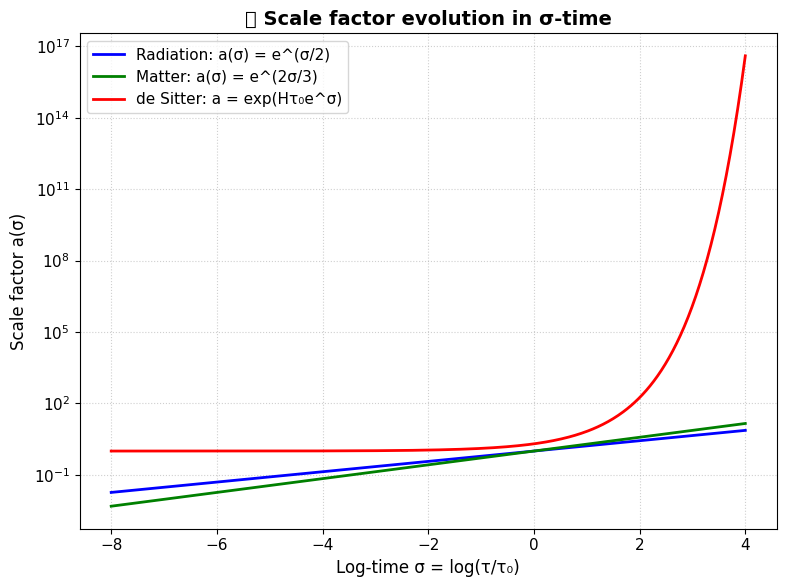

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "flrw_sigma_rate.png"), dpi=dpi, bbox_inches='tight')
d:\python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


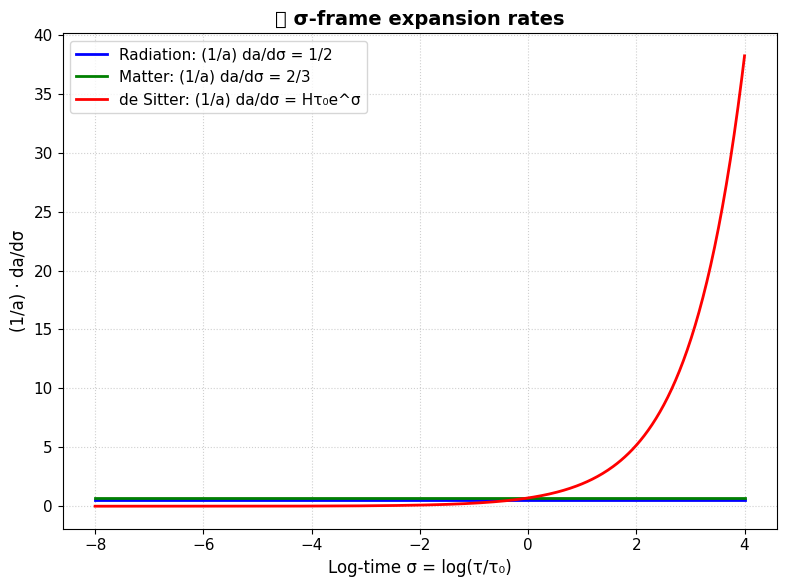

In [5]:
def visualize_flrw(tau0=1.0, H=1.0, save=False, outdir=".", dpi=150):
    """
    Visualize FLRW cosmological evolution in log-time coordinates.
    
    Compares three fundamental cosmological epochs:
    - Radiation domination: a ∝ t^(1/2)
    - Matter domination: a ∝ t^(2/3)  
    - de Sitter inflation: a = exp(Ht)
    """
    
    # Log-time range (early to late universe)
    sigma = np.linspace(-8, 4, 500)
    t = tau_from_sigma(sigma, tau0=tau0)

    # Power-law cosmologies become exponential in σ-coordinates
    n_rad = 0.5      # Radiation: a ∝ t^(1/2)
    n_mat = 2.0/3.0  # Matter: a ∝ t^(2/3)
    
    a_rad = np.exp(n_rad * sigma)  # Since a(σ) = e^(nσ) for power-law
    a_mat = np.exp(n_mat * sigma)

    # de Sitter inflation: a = exp(H×t) with t = τ₀e^σ
    a_des = np.exp(H * t)

    # σ-frame expansion rates: (1/a) da/dσ
    rate_rad = np.full_like(sigma, n_rad)       # Constant for power-law
    rate_mat = np.full_like(sigma, n_mat)       # Constant for power-law  
    rate_des = H * tau0 * np.exp(sigma)         # Exponentially growing for de Sitter

    # === PLOT 1: Scale factors in σ-time ===
    plt.figure(figsize=(8, 6))
    plt.plot(sigma, a_rad, 'b-', linewidth=2, label="Radiation: a(σ) = e^(σ/2)")
    plt.plot(sigma, a_mat, 'g-', linewidth=2, label="Matter: a(σ) = e^(2σ/3)")
    plt.plot(sigma, a_des, 'r-', linewidth=2, label="de Sitter: a = exp(Hτ₀e^σ)")
    plt.yscale("log")
    plt.title("🌌 Scale factor evolution in σ-time", fontsize=14, fontweight='bold')
    plt.xlabel("Log-time σ = log(τ/τ₀)", fontsize=12)
    plt.ylabel("Scale factor a(σ)", fontsize=12)
    plt.grid(True, ls=":", alpha=0.6)
    plt.legend(fontsize=11)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "flrw_scale_factor.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

    # === PLOT 2: σ-frame expansion rates ===
    plt.figure(figsize=(8, 6))
    plt.plot(sigma, rate_rad, 'b-', linewidth=2, label="Radiation: (1/a) da/dσ = 1/2")
    plt.plot(sigma, rate_mat, 'g-', linewidth=2, label="Matter: (1/a) da/dσ = 2/3")
    plt.plot(sigma, rate_des, 'r-', linewidth=2, label="de Sitter: (1/a) da/dσ = Hτ₀e^σ")
    plt.title("📈 σ-frame expansion rates", fontsize=14, fontweight='bold')
    plt.xlabel("Log-time σ = log(τ/τ₀)", fontsize=12)
    plt.ylabel("(1/a) · da/dσ", fontsize=12)
    plt.grid(True, ls=":", alpha=0.6)
    plt.legend(fontsize=11)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "flrw_sigma_rate.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

# Run the FLRW cosmology visualization
visualize_flrw(tau0=tau0, H=H, save=save_figures, outdir=output_dir, dpi=figure_dpi)

## 🚀 Run All Visualizations

Execute this cell to generate all visualizations at once with your chosen parameters.

🎯 Generating all log-time visualizations...

1️⃣ Singularity regularization...


C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:29: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:31: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "singularity_Q_tau.png"), dpi=dpi, bbox_inches='tight')


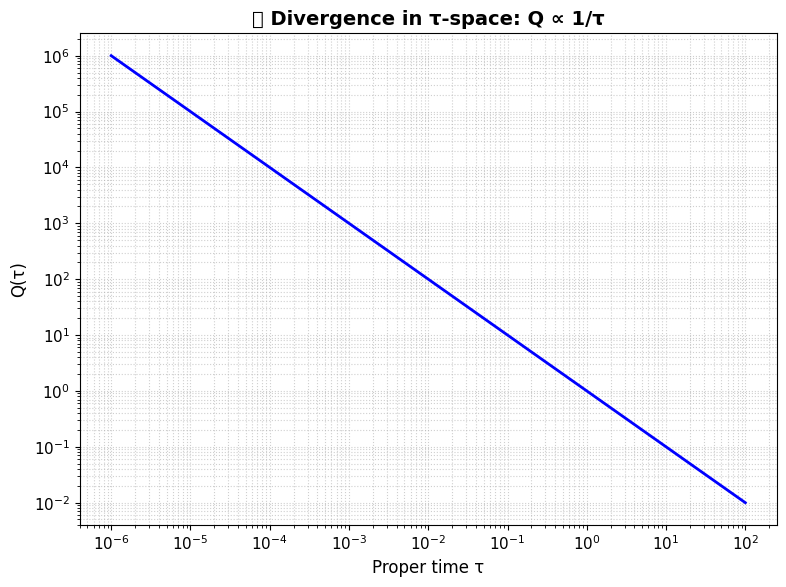

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:41: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\977310952.py:43: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "singularity_Q_sigma.png"), dpi=dpi, bbox_inches='tight')


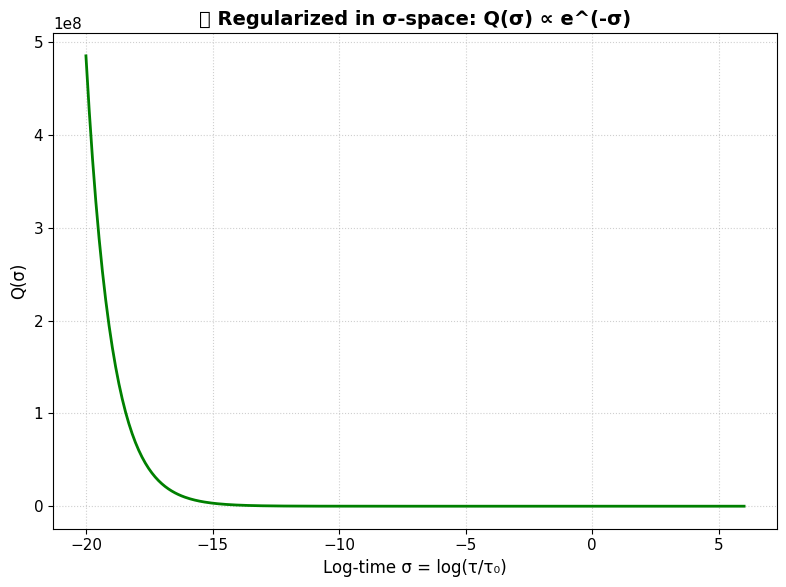

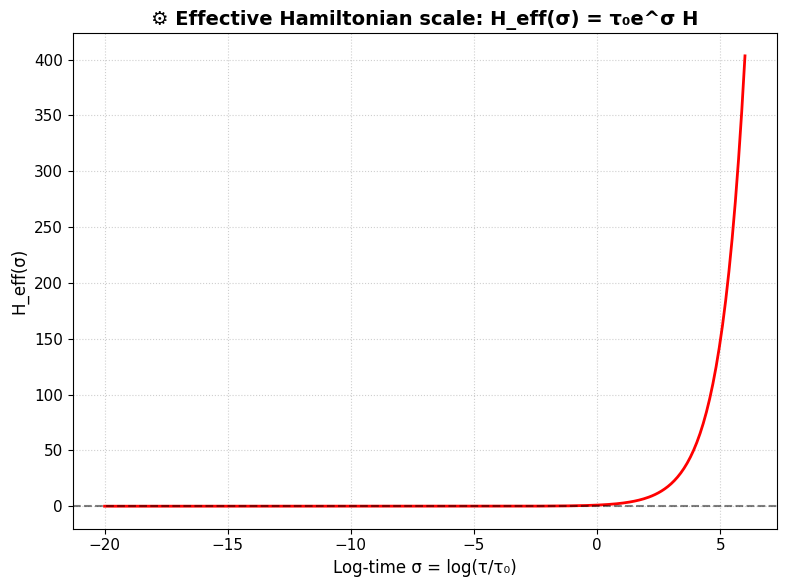


2️⃣ Near-horizon physics...


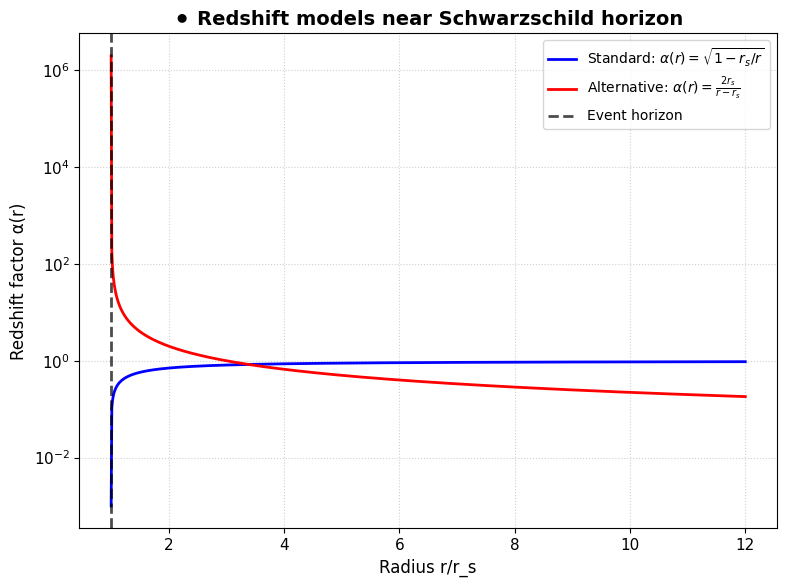

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\942771060.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\942771060.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "horizon_sigma.png"), dpi=dpi, bbox_inches='tight')


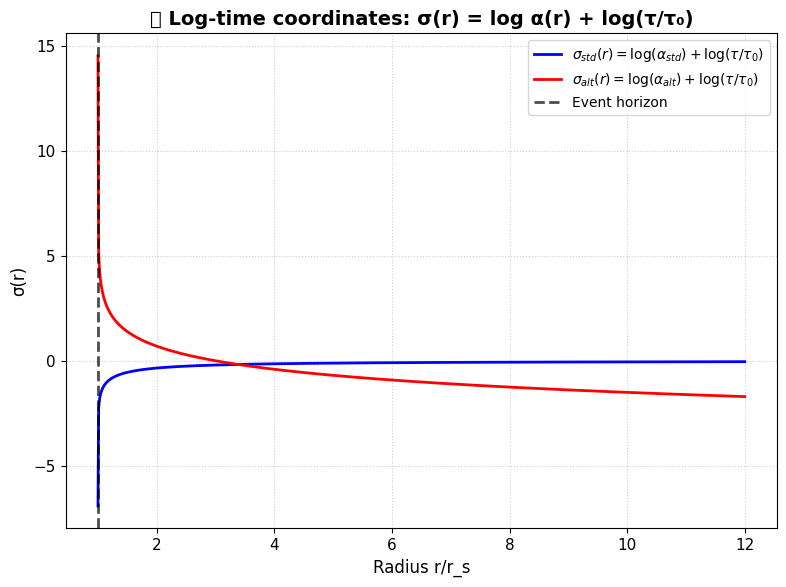


3️⃣ FLRW cosmology...


C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:41: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:43: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "flrw_scale_factor.png"), dpi=dpi, bbox_inches='tight')


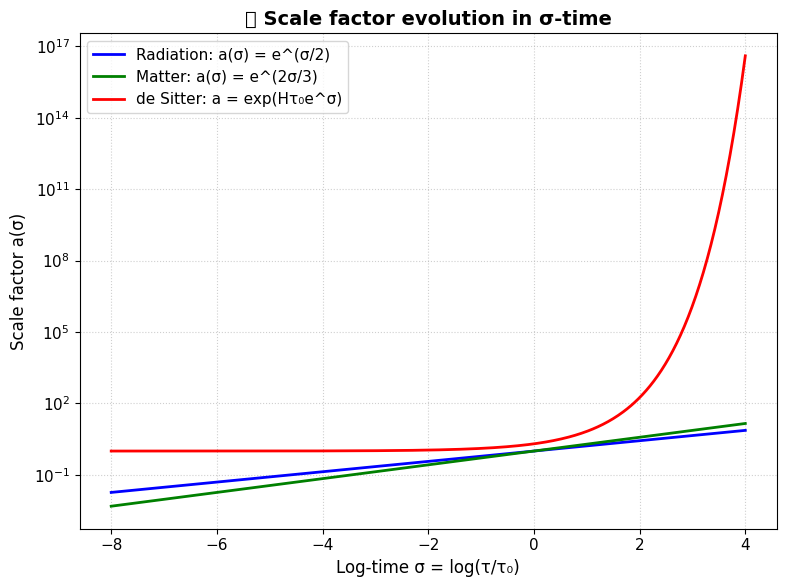

C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denzi\AppData\Local\Temp\ipykernel_71248\3887974236.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(outdir, "flrw_sigma_rate.png"), dpi=dpi, bbox_inches='tight')


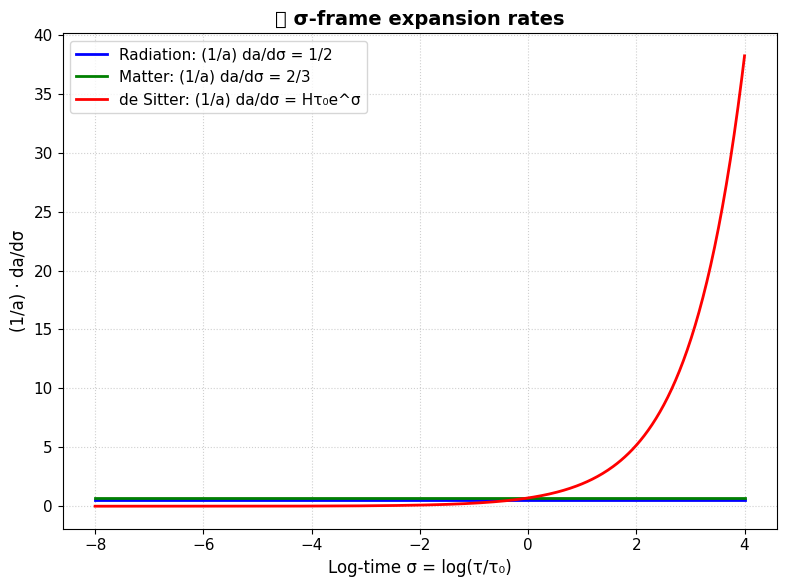


✅ All visualizations complete!
📁 Figures saved to: figs/
   Files created:
   • flrw_scale_factor.png
   • flrw_sigma_rate.png
   • horizon_alpha.png
   • horizon_sigma.png
   • singularity_H_eff.png
   • singularity_Q_sigma.png
   • singularity_Q_tau.png
📊 Total: 7 figures saved


In [6]:
print("🎯 Generating all log-time visualizations...")
print("=" * 50)

print("\n1️⃣ Singularity regularization...")
visualize_singularity(tau0=tau0, save=save_figures, outdir=output_dir, dpi=figure_dpi)

print("\n2️⃣ Near-horizon physics...")
visualize_horizon(rs=rs, rmax=rmax, tau_ratio_term=tau_ratio_term, 
                 save=save_figures, outdir=output_dir, dpi=figure_dpi)

print("\n3️⃣ FLRW cosmology...")
visualize_flrw(tau0=tau0, H=H, save=save_figures, outdir=output_dir, dpi=figure_dpi)

print("\n✅ All visualizations complete!")
if save_figures:
    print(f"📁 Figures saved to: {output_dir}/")
    # List saved files
    import glob
    png_files = glob.glob(os.path.join(output_dir, "*.png"))
    if png_files:
        print("   Files created:")
        for f in sorted(png_files):
            print(f"   • {os.path.basename(f)}")
    print(f"📊 Total: {len(png_files)} figures saved")

## 💡 Usage Tips

- **Modify parameters**: Edit the Controls cell and re-run affected visualizations
- **Save high-quality figures**: Set `save_figures = True` to export PNG files  
- **Explore different regimes**: Try varying τ₀, H, r_s, or r_max values
- **Mathematical insight**: The log-time transformation σ = log(τ/τ₀) reveals hidden structure in gravitational physics

### Key Results Demonstrated:
✅ **Singularities regularized**: 1/τ divergences → smooth e^(-σ) behavior  
✅ **Horizon physics clarified**: Different α(r) models → distinct σ(r) signatures  
✅ **Cosmology simplified**: Power-law evolution → exponential growth in σ-time

## 📊 **Paper-Specific Visualizations**

Based on reviewer feedback, we'll create the specific figures recommended for publication:

1. **σ vs τ mapping** - Show compression near τ → 0
2. **Quantum Zeno comparison** - Uniform vs log-uniform sampling survival probabilities
3. **Resonance structure** - Effect-size estimates for experimental design

In [ ]:
# ========================================
# FIGURE 1: σ vs τ Mapping (Reviewer Request)
# ========================================

def create_sigma_tau_mapping(tau0=1.0, save=False, outdir=".", dpi=150):
    """
    Create the σ vs τ mapping figure requested by reviewers.
    Shows compression near τ → 0 and the log-time transformation.
    """
    
    # τ range: from very small (near singularity) to macroscopic
    tau_vals = np.logspace(-6, 3, 1000)  # 10^-6 to 10^3
    sigma_vals = sigma_from_tau(tau_vals, tau0=tau0)
    
    # Create the mapping plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # === Left panel: τ vs σ mapping ===
    ax1.semilogx(tau_vals, sigma_vals, 'b-', linewidth=2.5)
    ax1.set_xlabel('Proper time τ (log scale)', fontsize=12)
    ax1.set_ylabel('Log-time σ = log(τ/τ₀)', fontsize=12)
    ax1.set_title('🔄 Log-time transformation: σ = log(τ/τ₀)', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.axvline(tau0, color='r', linestyle='--', alpha=0.7, label=f'Reference τ₀ = {tau0}')
    ax1.axhline(0, color='r', linestyle='--', alpha=0.7)
    
    # Annotate key regions
    ax1.annotate('Singularity region\n(τ → 0⁺, σ → -∞)', 
                xy=(1e-5, -12), xytext=(1e-3, -15),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=10, ha='center')
    ax1.annotate('Macroscopic region\n(τ >> τ₀, σ >> 0)', 
                xy=(100, np.log(100/tau0)), xytext=(10, 8),
                arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
                fontsize=10, ha='center')
    ax1.legend()
    
    # === Right panel: Scale compression visualization ===
    # Show how equal σ intervals correspond to geometric τ intervals
    sigma_uniform = np.linspace(-6, 6, 13)  # Uniform in σ
    tau_geometric = tau0 * np.exp(sigma_uniform)  # Geometric in τ
    
    ax2.loglog(tau_geometric, np.ones_like(tau_geometric), 'ro', markersize=8, label='Log-uniform schedule')
    
    # Show uniform τ schedule for comparison
    tau_uniform = np.linspace(tau0 * np.exp(-6), tau0 * np.exp(6), 13)
    ax2.loglog(tau_uniform, 1.1 * np.ones_like(tau_uniform), 'bs', markersize=6, label='Uniform τ schedule')
    
    ax2.set_xlabel('Proper time τ (log scale)', fontsize=12)
    ax2.set_ylabel('Measurement events', fontsize=12)
    ax2.set_title('📅 Measurement scheduling comparison', fontsize=14, fontweight='bold')
    ax2.set_ylim(0.5, 2)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add explanation text
    ax2.text(0.02, 0.95, 'Equal σ-steps → Geometric τ-steps\n(Dense near τ=0, sparse at large τ)', 
             transform=ax2.transAxes, fontsize=10, va='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "sigma_tau_mapping.png"), dpi=dpi, bbox_inches='tight')
    plt.show()

# Generate the mapping figure
create_sigma_tau_mapping(tau0=tau0, save=save_figures, outdir=output_dir, dpi=figure_dpi)

In [ ]:
# ========================================
# FIGURE 2: Quantum Zeno Comparison (Reviewer Request)
# ========================================

def quantum_zeno_comparison(Omega=1.0, T=10.0, N_vals=None, tau_min_factor=1e-3, 
                           save=False, outdir=".", dpi=150):
    """
    Compare quantum Zeno survival probabilities:
    - P_uni(T,N): Uniform-in-τ scheduling  
    - P_log(T,N): Log-uniform (uniform-in-σ) scheduling
    
    Shows the resonance structure predicted by the theory.
    """
    
    if N_vals is None:
        N_vals = [5, 10, 20, 50, 100]
    
    # For each N, calculate survival probabilities
    results_uni = []
    results_log = []
    
    for N in N_vals:
        # Uniform scheduling: P_uni = cos^(2N)((ΩT)/(2N))
        P_uni = np.cos(Omega * T / (2 * N))**(2 * N)
        
        # Log-uniform scheduling setup
        tau_min = tau_min_factor * T
        r = (T / tau_min)**(1/N)
        
        # Calculate intervals: τ_k = τ_min * r^k
        tau_k = tau_min * r**np.arange(1, N+1)
        Delta_tau_k = np.diff(np.concatenate(([0], tau_k)))
        
        # P_log = ∏ cos²(Ω·Δτ_k/2)
        P_log = np.prod(np.cos(Omega * Delta_tau_k / 2)**2)
        
        results_uni.append(P_uni)
        results_log.append(P_log)
    
    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # === Left panel: Survival probability comparison ===
    ax1.semilogx(N_vals, results_uni, 'b-o', linewidth=2, markersize=8, 
                label=f'Uniform-in-τ: P_uni(T,N)')
    ax1.semilogx(N_vals, results_log, 'r-s', linewidth=2, markersize=8,
                label=f'Log-uniform: P_log(T,N)')
    
    ax1.set_xlabel('Number of measurements N', fontsize=12)
    ax1.set_ylabel('Survival probability P(T,N)', fontsize=12)
    ax1.set_title(f'🎯 Quantum Zeno comparison (Ω={Omega}, T={T})', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11)
    ax1.set_ylim(0, 1.1)
    
    # === Right panel: Resonance structure for different τ_min ===
    # Sweep τ_min to show resonance dips
    tau_min_range = np.logspace(-4, -1, 100) * T
    N_fixed = 20
    P_log_sweep = []
    
    for tau_min in tau_min_range:
        r = (T / tau_min)**(1/N_fixed)
        tau_k = tau_min * r**np.arange(1, N_fixed+1)
        Delta_tau_k = np.diff(np.concatenate(([0], tau_k)))
        P_log = np.prod(np.cos(Omega * Delta_tau_k / 2)**2)
        P_log_sweep.append(P_log)
    
    ax2.semilogx(tau_min_range/T, P_log_sweep, 'g-', linewidth=2)
    ax2.set_xlabel('τ_min / T', fontsize=12)
    ax2.set_ylabel(f'P_log(T,N={N_fixed})', fontsize=12)
    ax2.set_title('🔍 Resonance structure vs τ_min', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Mark resonance predictions
    # Resonance when Ω·Δτ_k ≈ (2m+1)π for largest intervals
    resonance_markers = []
    for m in range(1, 4):  # Show first few resonances
        # Approximate: largest interval ≈ T/N_fixed for geometric series
        target_Delta_tau = (2*m + 1) * np.pi / Omega
        target_tau_min = T * (1 - (target_Delta_tau * N_fixed / T)**(1/N_fixed))
        if 0 < target_tau_min/T < 1:
            ax2.axvline(target_tau_min/T, color='red', linestyle='--', alpha=0.7,
                       label=f'Resonance m={m}' if m == 1 else '')
    
    if len(resonance_markers) > 0:
        ax2.legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(outdir, "quantum_zeno_comparison.png"), dpi=dpi, bbox_inches='tight')
    plt.show()
    
    return N_vals, results_uni, results_log

# Generate the quantum Zeno comparison
print("🎯 Generating Quantum Zeno comparison...")
N_vals, P_uni, P_log = quantum_zeno_comparison(Omega=2.0, T=10.0, 
                                              save=save_figures, outdir=output_dir, dpi=figure_dpi)